# 1.1 - Linear Regression Basics

__Input__: Dataset $((x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N))$ with a single feature (aka predictor, or covariate) and a response variable

__Purpose__: Find the "best" linear function $f(x) = \beta_0 + \beta_1 x$ that fits the data. 

__Approach__: Usually, "best" means to minimize the mean squared error between the linear fit and the data points.

__Assumptions__: That data can be fit by a linear relationship. 

__Hyperparameters__: None. Variations exist by including additional cost terms (Ridge, Lasso) in the optimization.

Any combination $(\beta_0, \beta_1)$ leads to a well-defined function which generates "predictions" $\hat{y}_i = f(x_i)$ for any given $x_i$. A residual is the distance between this prediction and the "true" value (in the dataset) $y_i$ and the predicted value $\hat{y}_i$: $r = y_i - \hat{h}_i$. 

Computing the residuals across the whole dataset, computing their squared values, and then averaging them all generates the MSE: $\mathrm{MSE} = \frac{1}{N}\sum_{i=1}^{N} (y_i - \hat{y}_i)^2$. This acts as the loss function that is being minimized to find the best choice of parameters.

This minimization can be done analytically to generate closed form solutions for the parameters! Defining the mean over x or y with the overline $\overline{x}$, the coefficients are:

$$ \hat{\beta_1} = \frac{\sum_i (x_i - \overline{x})(y_i - \overline{y}) }{\sum_I (x_i - \overline{x})^2} , \quad \hat{\beta_0} = \overline{y} - \hat{\beta_1} \overline{x}$$ 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from data_generation import generate_linear_noisy_data

    
def estimate_slope(x, y):
    y_mean = np.mean(y)
    x_mean = np.mean(x)
    numerator = np.dot(x - x_mean, y - y_mean)
    denominator = np.sum( (x - x_mean)**2 )
    return numerator / denominator

def linear_regression_coeffs(x, y):
    """ 
    Uses the closed form solution of the coeffs to estimate them
    """
    y_mean = np.mean(y)
    x_mean = np.mean(x)
    slope = estimate_slope(x, y)
    intercept = y_mean - slope*x_mean 
    return intercept, slope

def linear_regression_estimate(x, intercept, slope):
    return intercept + slope * x

def linear_regression_coeffs_scikit(X, y):
    """
    Perform linear regression analysis on the given dataset.
    
    Parameters:
    X (array-like): Independent variable.
    y (array-like): Dependent variable.
    
    Returns:
    slope (float): Slope of the fitted line.
    intercept (float): Intercept of the fitted line.
    """
    
    # Reshape X into a 2D array (required by scikit-learn)
    X = np.array(X).reshape(-1, 1)
    
    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Get the slope and intercept of the fitted line
    slope = model.coef_[0]
    intercept = model.intercept_
    
    return intercept, slope


In [4]:
def generate_linear_noisy_data(num_points, x_amp, noise_strength, slope, intercept):
    # Set random seed for reproducibility
    np.random.seed(1)
    
    # Generate random x values between 0 and 10
    x = x_amp * np.random.rand(num_points)
    
    # Generate random noise for y values
    noise = noise_strength * np.random.randn(num_points)
    
    # Generate y values using a linear relationship with noise
    y_noise = slope * x + intercept + noise
    y_true = slope * x + intercept
    return x, y_true, y_noise

# Generate example
num_points = 100
x_amp = 10
noise_strength = 2
slope = 3
intercept = 2
x, y_true, y = generate_linear_noisy_data(num_points, x_amp, noise_strength, slope, intercept)

In [5]:
# Perform LR with analytical solution
intercept_est, slope_est = linear_regression_coeffs(x, y)
y_estimate = linear_regression_estimate(x, intercept_est, slope_est)

In [6]:
# Perform LR with scikit
intercept_sci, slope_sci = linear_regression_coeffs_scikit(x, y) 
y_estimate_sci = linear_regression_estimate(x, intercept_sci, slope_sci)

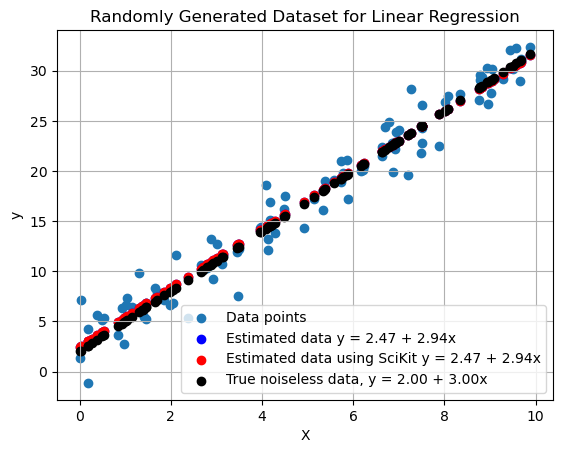

In [7]:
# Plot the data
plt.scatter(x, y, label='Data points')
plt.scatter(x, y_estimate, label=f"Estimated data y = {intercept_est:.2f} + {slope_est:.2f}x", c="blue")
plt.scatter(x, y_estimate_sci, label=f"Estimated data using SciKit y = {intercept_sci:.2f} + {slope_sci:.2f}x", c="red")
plt.scatter(x, y_true, label=f"True noiseless data, y = {intercept:.2f} + {slope:.2f}x", c="black")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Randomly Generated Dataset for Linear Regression')
plt.legend()
plt.grid(True)
plt.show()